# 확률적 경사 하강법
* 확률적 경사 하강법에서 확률적이란 말은 무작위하게 혹은 랜덤하게의 기술적인 표현입니다. 
* 경사는 기울기를 의미합니다. 
* 하강법은 내려가는 방법입니다. 

* 산에서 내려온다고 생각해본다면 등산로 입구까지 내려가야 하는데 가장 빠른 길은 경사가 가장 가파른 길! 
* 이 개념이 경사 하강법의 개념 

* 아래 그림처럼 내려오는 보폭이 너무 크면 원하는 지점을 지나쳐 갈수 있음 

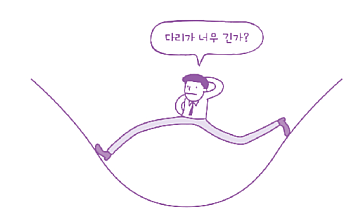

* 확률적이라는 말은 실제로는 훈련 데이터 셋을 사용해 모델을 훈련하기 때문에 경사 하강법도 당연히 훈련 세트를 사용하여 가장 가파른 길을 찾을 것
* 그런데 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는 것이 확률적 경사 하강법
* 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려갑니다. 그 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려갑니다. 
* 이런 식으로 전체 샘플을 모두 사용할 때까지 계속합니다. 
* 이렇게 해서 답을 찾지 못하면 다시 처음부터 시작합니다. 그 다음 다시 랜덤하게 하나의 샘플을 선택해 이어서 경사를 내려갑니다. 
* 확률적 경사 하강법에서 훈련 세트를 한번 모두 사용하는 과정을 에포크(epoch)라고 부릅니다. 
-------------
* 1개의 데이터셋을 사용하여 내려오는 것보다 여러 개를 한꺼번에 묶어서 사용하면 시간이 더 절약될 것입니다. 이 아이디어가 미니배치 경사 하강법(minibatch gradient descent)이라고 합니다. 
* 반대로 전체 샘플을 사용하여 진행하는 것을 배치 경사 하강법이라고 합니다. 
    * 컴퓨터의 제약등으로 인해서 잘 사용하지 않습니다. 

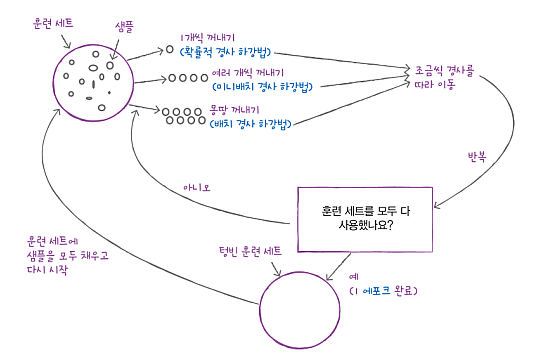

# 손실함수
* loss(cost) function는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준 
* 값은 작을수록 좋지만 어떤 값이 최솟값인지는 알지 못함 
* 가능한 많이 찾아보고 만족할만한 수준이라면 산에서 다 내려왔다고 인정해야 합니다. 
    * 손실 함수는 샘플 하나에 대한 손실을 정의하고 
    * 비용 함수는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 의미 
    * 손실 함수, 비용 함수 용어는 구분하지 않고 섞어서 사용합니다. 

## 로지스틱 손실 함수

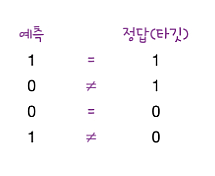

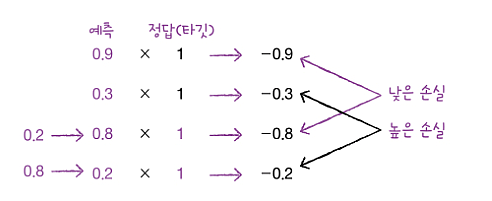

* 예측 확률에 로그 함수를 적용하면 더 좋습니다. 예측 확률의 범위는 0 ~ 1 사이인데 로그 함수는 이 사이에서 음수가 되므로 최종 손실 값은 양수가 됩니다. 
* 손실이 양수가 되면 이해하기 더 쉽습니다. 또 로그 함수는 0에 가까울수록 아주 큰 음수가 되기 때문에 손실을 아주 크게 만들어 모델에 큰 영향을 미칠수 있습니다. 

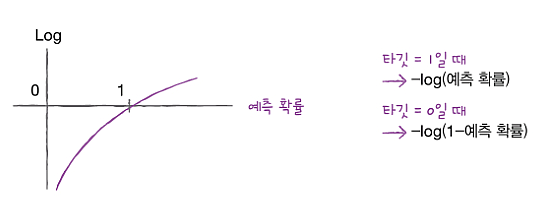

* 이 손실 함수를 로지스틱 손실 함수 또는 이진 크로스엔트로피 손실 함수라고 부릅니다. 
* 다중 분류에서 사용하는 손실 함수를 크로스엔트로피 손실 함수라고 부릅니다. 

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier

* SGDClassifier의 객체를 만들 때 2개의 매개변수를 지정
* loss는 손실 함수의 종류
    * log로 지정하여 로지스틱 손실 함수를 지정 
* max_iter는 수행할 에폭(epoch) 횟수를 지정 
    * 너무 많이 epoch 숫자를 넣으면 과적합이 일어남

In [6]:
sc = SGDClassifier(loss='log', max_iter=1000, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


In [7]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.907563025210084
0.925


# 경사하강법의 예제

* sklearn의 데이터셋에서 당뇨병 데이터를 가져와서 경사하강법의 동작 원리를 확인해본다 

In [8]:
from sklearn.datasets import load_diabetes

In [9]:
diabetes = load_diabetes()

* 데이터의 형상을 확인한다. 

In [10]:
diabetes.data.shape

(442, 10)

In [11]:
diabetes.target[:3]

array([151.,  75., 141.])

* 데이터가 분포를 시각화를 통해서 확인 

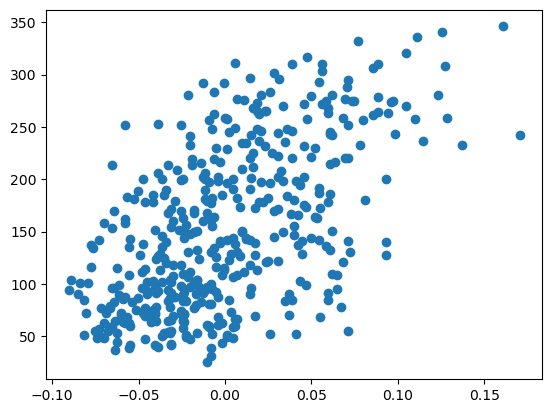

In [12]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.show()

* 3번째 위치한 컬럼을 이욯해서 target값을 예측해본다. 

In [13]:
x = diabetes.data[:, 2 ]
y = diabetes.target

* y = ax + b
* 위의 공식은 중학교때 배운 직선의 방정식의 공식이다. 
* 단순 선형회귀도 직선으로 나타는 방정식이다. 다만 부르는 용어가 수학시간에 배웠던 기울기, 절편이라는 용어대신 가중치, 편향이라는 단어를 사용한다. 

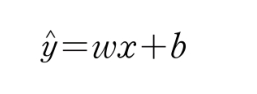

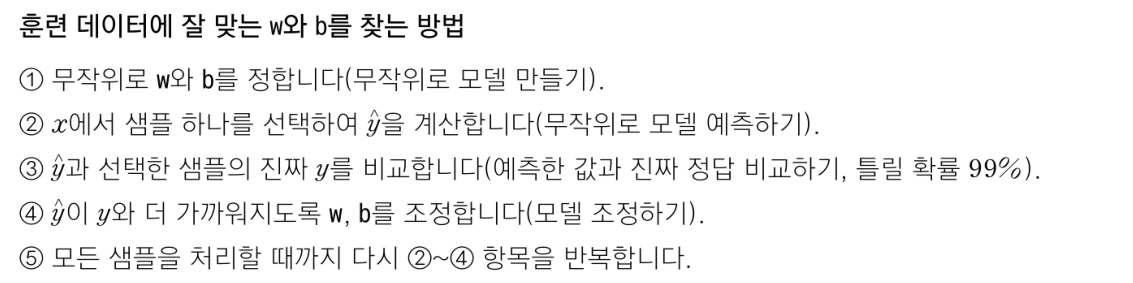

* 무작위로 w와 b를 정함 

In [14]:
w = 1.0
b = 1.0 

*  h_hat를 계산 

In [15]:
y_hat = x[0] * w + b 
print(y_hat)

1.0616962065186886


* 실제 값과 예측된 값의 차이를 확인 

In [16]:
y[0] - y_hat

149.9383037934813

* w의 값을 조정하여 y_hat를 다시 계산 

In [17]:
w_inc = w + 0.1 
y_hat_inc = x[0] * w_inc + b

In [18]:
y_hat_inc

1.0678658271705574

* w 값이 조정한 후 예측값이 얼마나 증가했는가?

In [19]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)

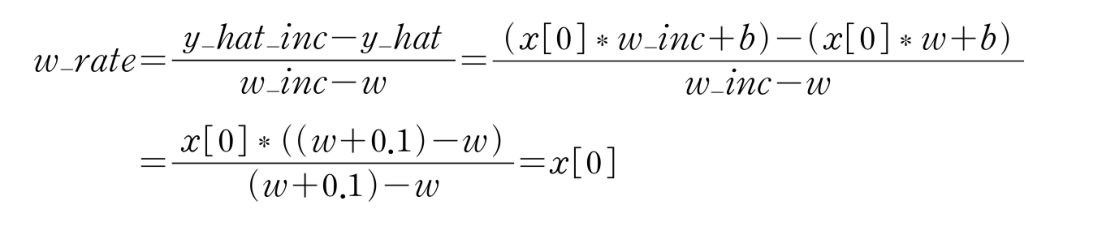

* 변화율이 양수일때

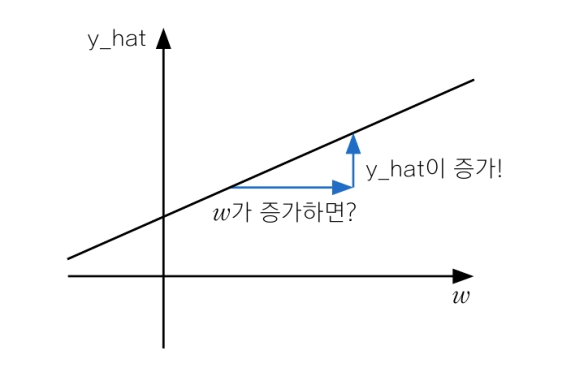

* 변화율이 음수일때

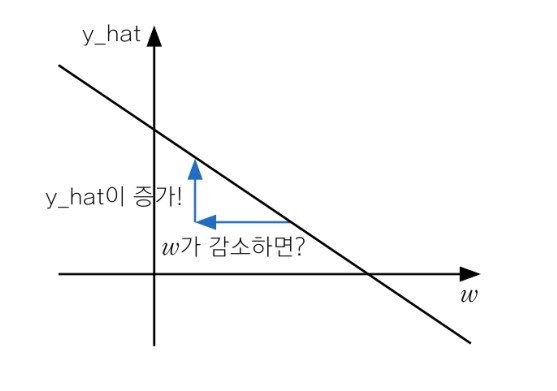

* 변환된 값을 근거로 하여 w_new 값을 생성 

In [20]:
w_new = w + w_rate

* 이번에는 변화율로 bias 업데이트한다. 이때 w의 값은 이전 변화되기 전의 w값을 사용한다. 
* 실제 내부적으로 편미분을 사용하여 계산하지만 설명을 위해서 절차식으로표현 

In [21]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc 
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186887
1.0


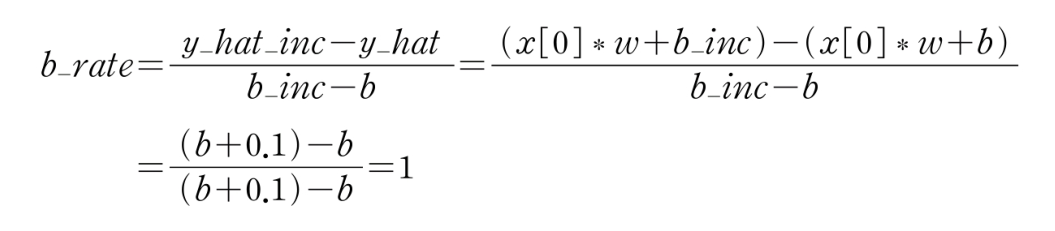

## 오차역전파 
* 변화율과 실제 값과 예측 값의 차이인 err 값을 활용하여 weight 값을 변화시킨다 

In [22]:
err = y[0] - y_hat 
w_new = w + w_rate * err
b_new = b + 1 * err

* err를 값을 반영하여 값들을 갱신하면 수렴하는 속도가 휠씬 빠르다. 

In [23]:
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [24]:
x.shape

(442,)

In [25]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


* 데이터를 100 에폭으로 학습시킨다. 

In [26]:
for i in range(100):
    for x_i, y_i in zip(x , y ):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


In [27]:
y_hat = 913.6*x + 123.4

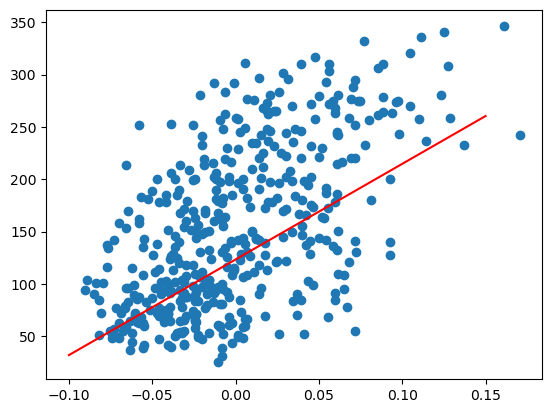

In [28]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.plot([-0.1, 0.15 ], [-0.1*w+b, 0.15*w+b ], color='r')
plt.show()

* sklearn의 linearregression를 사용하여 계수를 추청해본다. 

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(x.reshape(-1,1), y)

print(lr.coef_, lr.intercept_)

[949.43526038] 152.1334841628967


# 에포크와 과대/과소적합
* 에포크를 많이 진행하면 좋을거 같지만 실제로 많이 진행하면 과대적합 문제가 발생된다. 
* 과대적합 및 과소적합을 확인할수 있는 방법중 하나는 그래프를 통해서 확인하는 것이다. 

In [30]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [31]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

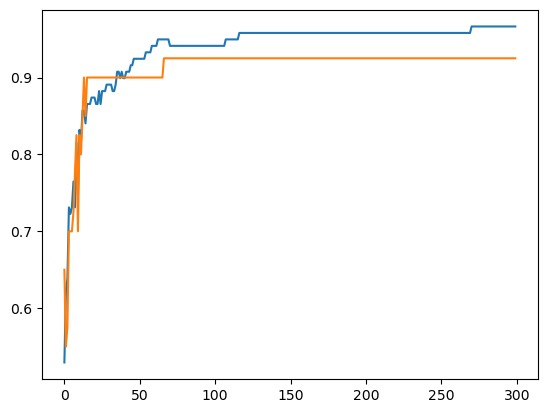

In [32]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()

* 훈련 데이터는 보통 에포크를 진행할때마다 성능이 높아지지만 테스트 데이터는 처음에는 같이 성능이 높아지지만 에포크가 진행될 수록 오히러 성능이 떨어지는 현상이 일어난다. 
* 이때가 훈련을 정지시켜야 하는 지점이다. 

In [33]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


* loss 함수로 다양한 함수르 제공한다. 
* loss 선택은 사용자가 정하는 하이퍼파라이터이다. 

In [34]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
